In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

In [37]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    img = img.resize((256, 256))
    return img

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(30, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.tight_layout()
    #plt.savefig('zeros.jpg')
    plt.show()

In [4]:
# Loading already learned representations
kaur = np.load('latent_representations/kaur_1.npy')
leo = np.load('latent_representations/leo.npy')

In [6]:
type(kaur), kaur.shape

(numpy.ndarray, (18, 512))

In [5]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy') 

# Age transformation

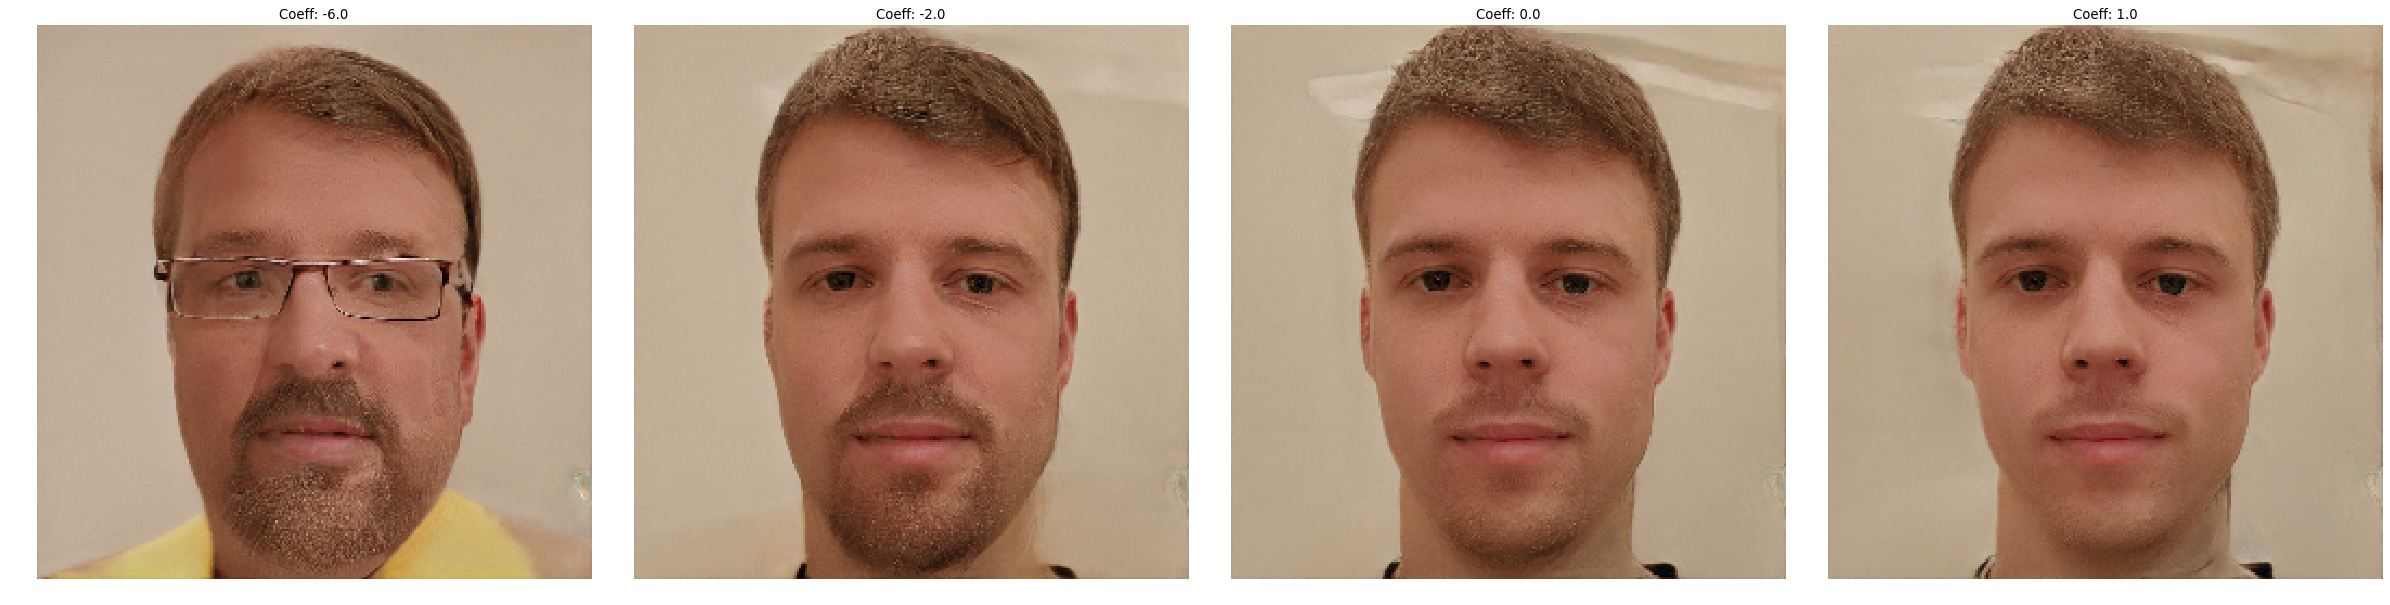

In [6]:
move_and_show(kaur, age_direction, [-6, -2, 0, 1])

# Gender transformation

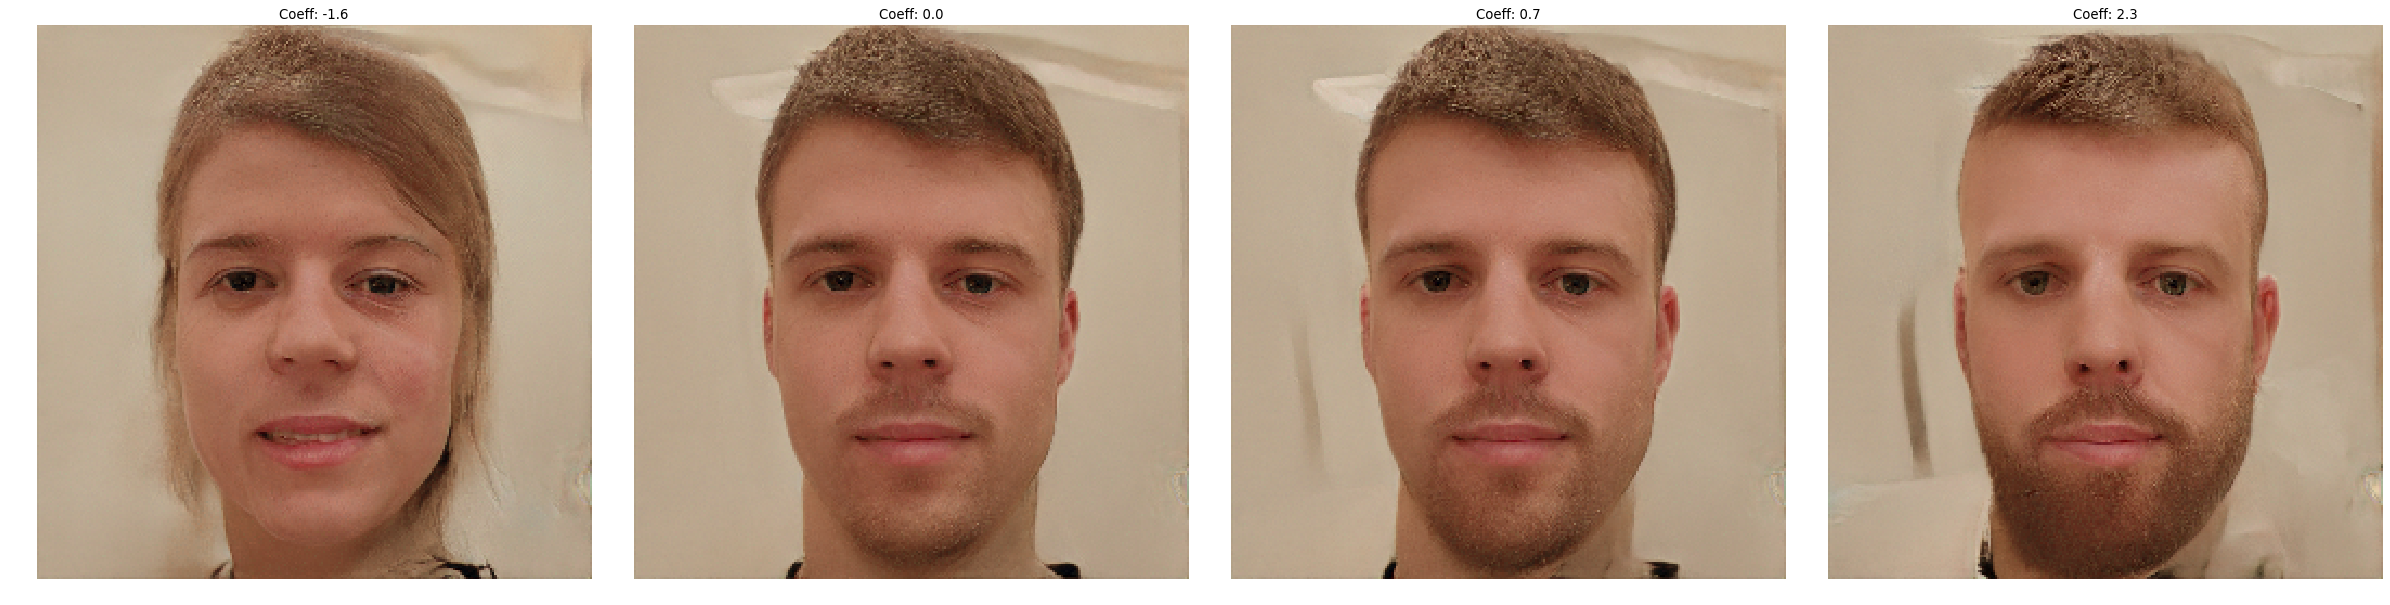

In [7]:
move_and_show(kaur, gender_direction, [-1.6, 0, 0.7, 2.3])

# Smile transformation

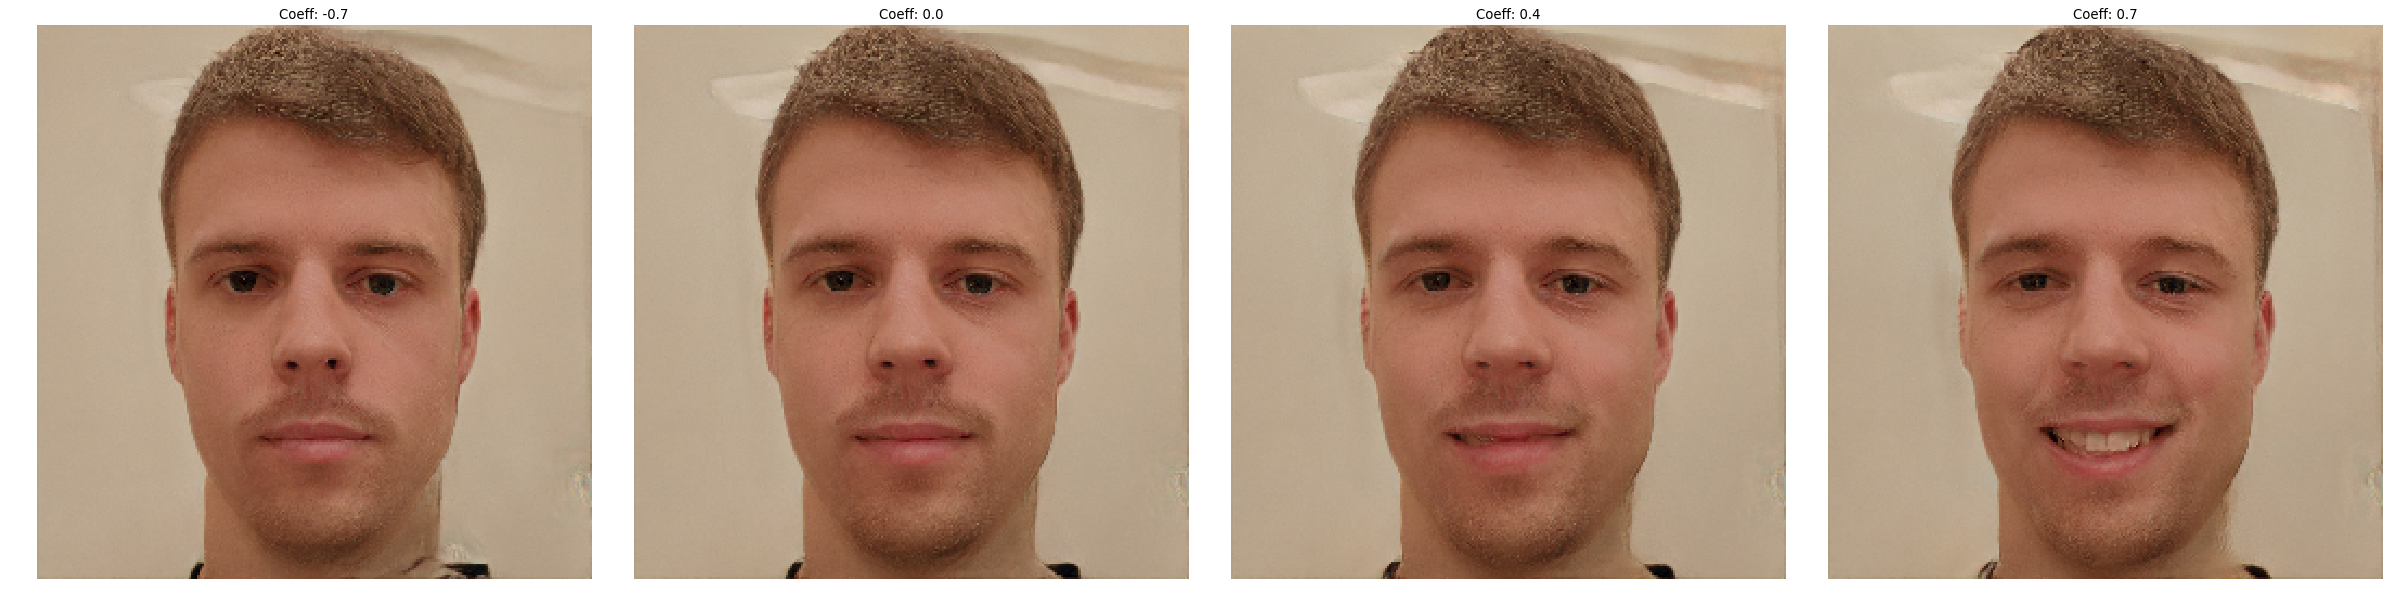

In [8]:
move_and_show(kaur, smile_direction, [-0.7, 0.0, 0.4, 0.7])

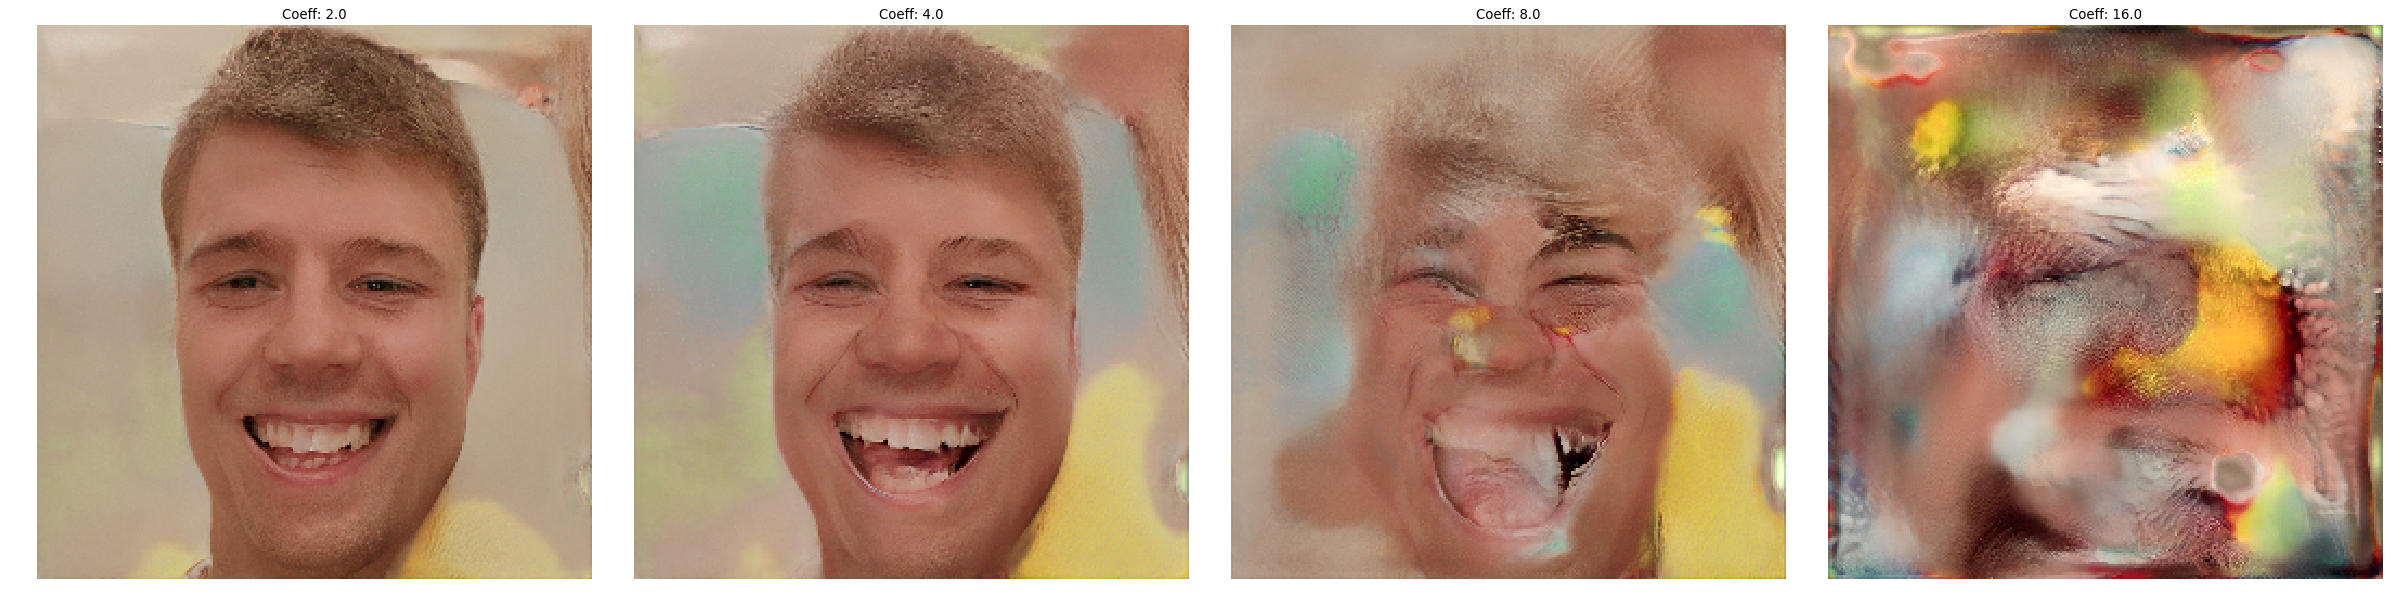

In [9]:
move_and_show(kaur, smile_direction, [2, 4, 8, 16])

In [18]:
leo.shape

(18, 512)

In [17]:
np.absolute(leo).sum(), np.absolute(kaur).sum()

(1876.3872, 1685.7565)

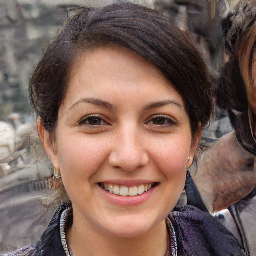

In [39]:
generate_image(np.zeros((18, 512)))

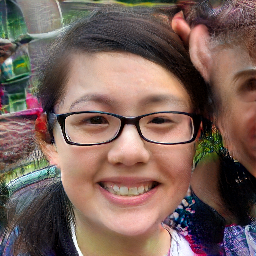

In [55]:
generate_image(np.zeros((18, 512)) - 0.05)

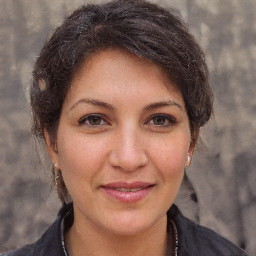

In [56]:
generate_image(np.zeros((18, 512)) + 0.05)

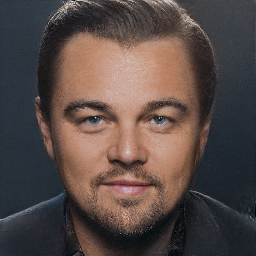

In [41]:
generate_image(leo)

In [ ]:
from IPython.core.display import display

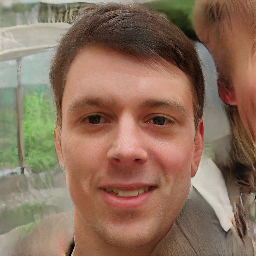

In [71]:
temp = kaur.copy()
temp[:, 256:] = -0.05
generate_image(temp)

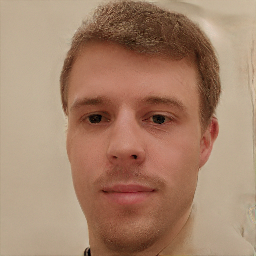

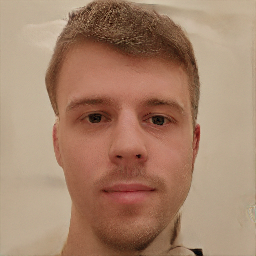

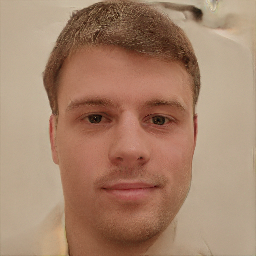

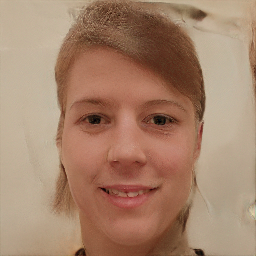

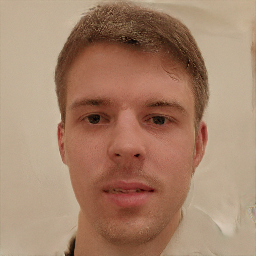

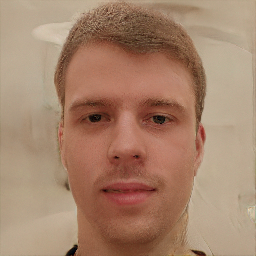

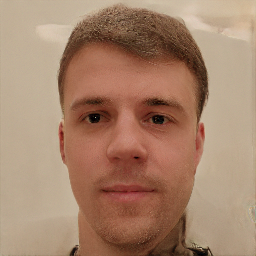

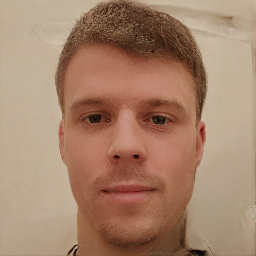

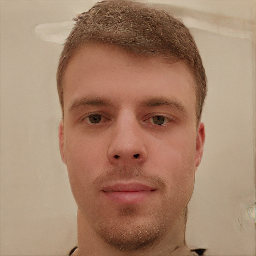

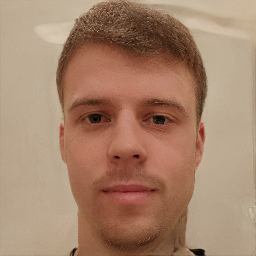

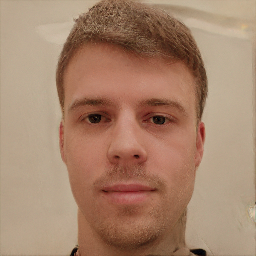

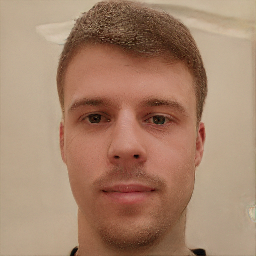

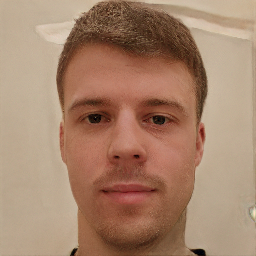

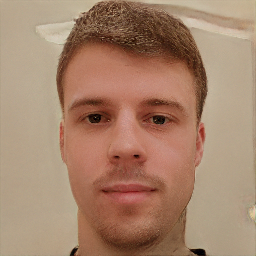

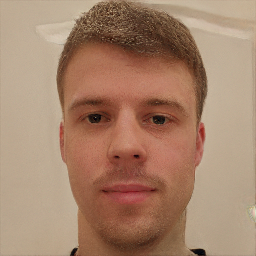

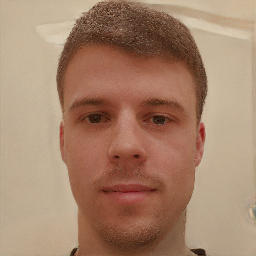

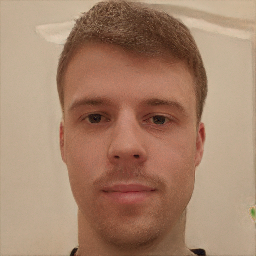

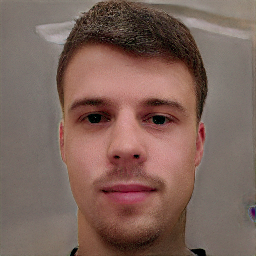

In [59]:
for i in range(kaur.shape[0]):
    temp = kaur.copy()
    temp[i] = np.zeros(512)
    display(generate_image(temp))

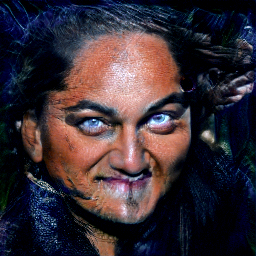

In [43]:
diff = leo - kaur
generate_image(diff)

In [6]:
count = 100
transform = kaur.copy()
part_diff = diff / count
frame_rate = 24
frames = 0

In [7]:
img = generate_image(transform)

for i in range(frame_rate):
    frames += 1
    img.save("gif/img{:03d}.jpg".format(frames))

for i in range(count):
    frames += 1
    transform += part_diff
    img = generate_image(transform)
    img.save("gif/img{:03d}.jpg".format(frames))

transform += part_diff
img = generate_image(transform)
for i in range(frame_rate):
    frames += 1
    img.save("gif/img{:03d}.jpg".format(frames))

#### compress image folder
tar -czvf frames.tar.gz /gif
#### download compressed folder using jupyter notebook or
https://unix.stackexchange.com/questions/106480/how-to-copy-files-from-one-machine-to-another-using-ssh
#### uncompress
tar -xzvf frames.tar.gz
#### create an animated gif
convert -delay 4 -loop 0 *.jpg kaurLeo.gif
#### create reverse gif
convert kaurLeo.gif -coalesce -duplicate 1,-2-1 -quiet -layers OptimizePlus  -loop 0 patrol_cycle.gif
## or make video instead of gif:

In [64]:
for i in range(count):
    img = generate_image(transform)
    img.save("gif/img{:03d}.jpg".format(i))
    transform += part_diff    

In [65]:
import cv2
import os

image_folder = 'gif'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()
start = [images[0]] * (frame_rate)

reverse = images.copy()
reverse.sort(reverse=True)
end = [reverse[0]] * (frame_rate)

images =  start + images + end + reverse 

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, frame_rate, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

#cv2.destroyAllWindows()
video.release()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#iters: 1, 100, 1k, 2k, 3k, 4k, 5k, 6k,
#loss: 2.43 .56 .25 .18 .16 .14 .13, .14

plt.scatter([100, 1000, 2000, 3000, 4000, 5000, 6000],[.56, .25, .18, .16, .14, .13, .14])
plt.title('Image encoding loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()